In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_excel('C:/Users/sudet/Downloads/210/final_dataset.xlsx')

In [8]:
# Convert the Date and Time columns to datetime format if not already done
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])

# Group by Date and aggregate the Amount and Balance
daily_spending = df.sort_values(by='DateTime').groupby('Date').agg({
    'Amount': 'sum',
    'Balance': 'last'
}).reset_index()

# Convert the Date column to datetime format for sorting
daily_spending['Date'] = pd.to_datetime(daily_spending['Date'], format='%d.%m.%Y')

# Sort by Date starting from the earliest
daily_spending = daily_spending.sort_values(by='Date')

# Display the daily spending
print(daily_spending)

          Date   Amount   Balance
59  2022-10-04  -229.00   4146.00
72  2022-10-05  -450.99   3695.01
98  2022-10-07   -28.70   6166.31
110 2022-10-08   -50.95   6115.36
125 2022-10-09   -15.60   6099.76
..         ...      ...       ...
279 2024-10-21   -70.00  22238.54
289 2024-10-22  -435.00  21803.54
300 2024-10-23  -295.20  21508.34
317 2024-10-24 -1964.13  19544.21
326 2024-10-25 -2319.94  17224.27

[390 rows x 3 columns]


C:\Users\sudet\AppData\Local\Temp\ipykernel_19320\1556106525.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


In [9]:
daily_spending.head()

,Date,Amount,Balance
59,2022-10-04,-229.00,4146.00
72,2022-10-05,-450.99,3695.01
98,2022-10-07,-28.70,6166.31
110,2022-10-08,-50.95,6115.36
125,2022-10-09,-15.60,6099.76


In [11]:
fig = px.scatter(daily_spending, x='Date', y='Amount', title='Daily Spending Over Time')
fig.update_traces(marker=dict(color='green'))
fig.show()

In [18]:
# Resample the daily spending to weekly spending
weekly_spending = daily_spending.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

# Calculate the average weekly spending
weekly_spending['Average Weekly Spending'] = weekly_spending['Amount'] / 7

# Plot the average weekly spending using Plotly
fig = px.line(weekly_spending, x='Date', y='Average Weekly Spending', title='Average Weekly Spending Over Time')
fig.update_traces(line=dict(color='lightpink'))
fig.show()

In [21]:

# Resample the daily spending to monthly spending
monthly_spending = daily_spending.resample('M', on='Date').sum().reset_index().sort_values(by='Date')

# Calculate the average monthly spending
monthly_spending['Average Monthly Spending'] = monthly_spending['Amount'] / monthly_spending['Date'].dt.daysinmonth

# Plot the average monthly spending using Plotly
fig = px.line(monthly_spending, x='Date', y='Average Monthly Spending', title='Average Monthly Spending Over Time')
fig.update_traces(line=dict(color='palevioletred'))
fig.show()

In [22]:

fig = px.line(daily_spending, x='Date', y='Balance', title='Daily Balance Over Time')
fig.update_traces(line=dict(color='lightsteelblue'))
fig.show()

In [23]:
# Extract the hour from the DateTime column
df['Hour'] = df['DateTime'].dt.hour

# Group by hour and calculate the average spending
average_spending_per_hour = df.groupby('Hour')['Amount'].mean()

print(average_spending_per_hour)

Hour
0     -277.547333
1     -624.146000
2     -101.246667
6     -587.815000
7    -6800.000000
8     -119.166667
9    -1429.652143
10    -301.735435
11    -422.063500
12    -331.620735
13    -747.265532
14    -444.011852
15    -873.602500
16    -379.716786
17    -665.702687
18    -458.815077
19    -381.449796
20    -382.572821
21    -446.211471
22    -730.854167
23    -237.872500
Name: Amount, dtype: float64


In [28]:
fig = px.bar(average_spending_per_hour, x=average_spending_per_hour.index, y='Amount', title='Average Spending Per Hour')
fig.update_layout(xaxis_title='Hour', yaxis_title='Average Spending')
fig.update_traces(marker=dict(color='darkturquoise'))
fig.show()

In [29]:
# Count the number of transactions per hour
transactions_per_hour = df.groupby('Hour').size()

# Plot the number of transactions per hour using Plotly
fig = px.bar(transactions_per_hour, x=transactions_per_hour.index, y=transactions_per_hour.values, title='Number of Transactions Per Hour')
fig.update_layout(xaxis_title='Hour', yaxis_title='Number of Transactions')
fig.update_traces(marker=dict(color='mediumseagreen'))
fig.show()

In [41]:
# Group by Category and sum the Amount
category_spending = df.groupby('Category')['Amount'].sum().reset_index()

# Take the absolute values of the Amount column
category_spending['Amount'] = category_spending['Amount'].abs()

# Plot the pie chart using Plotly
fig = px.pie(category_spending, values='Amount', names='Category', title='Spending by Category')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [23]:
# Convert the Date column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Group by month and category, then sum the amounts
monthly_spending_by_category = df.groupby([df['Date'].dt.to_period('M'), 'Category'])['Amount'].sum().reset_index()

# Convert the Date column back to datetime format for plotting
monthly_spending_by_category['Date'] = monthly_spending_by_category['Date'].dt.to_timestamp()

# Plot the monthly spending trends by category using Plotly
fig = px.line(monthly_spending_by_category, x='Date', y='Amount', color='Category', title='Monthly Spending Trends By Category')
fig.update_traces(line=dict(shape='linear'))
fig.show()

In [25]:
# Exclude the specified categories
filtered_monthly_spending = monthly_spending_by_category[~monthly_spending_by_category['Category'].isin(['education', 'other', 'investment'])]

# Plot the filtered monthly spending trends by category using Plotly
fig = px.line(filtered_monthly_spending, x='Date', y='Amount', color='Category', title='Monthly Spending Trends By Category (Excluding Education, Other, and Investment)')
fig.update_traces(line=dict(shape='linear'))
fig.show()

In [27]:
# Get the unique categories
categories = monthly_spending_by_category['Category'].unique()

# Define a color sequence
color_sequence = px.colors.qualitative.Plotly

# Loop through each category and create a plot
for i, category in enumerate(categories):
    category_data = monthly_spending_by_category[monthly_spending_by_category['Category'] == category]
    fig = px.line(category_data, x='Date', y='Amount', title=f'Monthly Spending Trends for {category}', color_discrete_sequence=[color_sequence[i % len(color_sequence)]])
    fig.update_traces(line=dict(shape='linear'))
    fig.show()

In [42]:
# Group by Emotional State and count the occurrences
emotional_state_counts = df['Emotional State'].value_counts().reset_index()
emotional_state_counts.columns = ['Emotional State', 'Count']

# Plot the emotional state counts using Plotly
fig = px.bar(emotional_state_counts, x='Emotional State', y='Count', title='Emotional State Distribution')
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Count')
fig.update_traces(marker=dict(color='mediumpurple'))
fig.show()

In [62]:
# Filter out rows with missing Emotional State
df_filtered = df.dropna(subset=['Emotional State'])

# Define the order of emotional states
emotional_state_order = [
    'strong positive', 'positive', 'mildly positive', 'neutral',
    'mildly negative', 'negative', 'strong negative'
]

# Plot the emotional state over time using Plotly
fig = px.line(df_filtered, x='DateTime', y='Emotional State', title='Emotional State Over Time',
              category_orders={'Emotional State': emotional_state_order})
fig.update_traces(line=dict(color='dodgerblue'))
fig.show()

In [22]:
# Group by Emotional State and sum the Amount
total_spending_by_emotional_state = df.groupby('Emotional State')['Amount'].sum().reset_index()

# Take the absolute values of the Amount column
total_spending_by_emotional_state['Amount'] = total_spending_by_emotional_state['Amount'].abs()

# Plot the total spending by emotional state using Plotly
fig = px.bar(total_spending_by_emotional_state, x='Emotional State', y='Amount', title='Total Spending By Emotional State',
             category_orders={'Emotional State': emotional_state_order})
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Total Spending')
fig.update_traces(marker=dict(color='darkorange'))
fig.show()

In [21]:
# Define the order of emotional states
emotional_state_order = [
    'strong positive', 'positive', 'mildly positive', 'neutral',
    'mildly negative', 'negative', 'strong negative'
]

# Take the absolute values of the Amount column
average_spending_by_emotional_state['Amount'] = average_spending_by_emotional_state['Amount'].abs()

# Plot the average spending by emotional state using Plotly
fig = px.bar(average_spending_by_emotional_state, x='Emotional State', y='Amount', title='Average Spending By Emotional State',
             category_orders={'Emotional State': emotional_state_order})
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Average Spending')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

In [47]:
df['Amount'] = df['Amount'].abs()

fig = px.scatter(df, x='Balance', y='Amount', title='Balance vs Amount log scaled')
fig.update_traces(marker=dict(color='blue', opacity=0.5))
fig.update_yaxes(type='log')
fig.show()

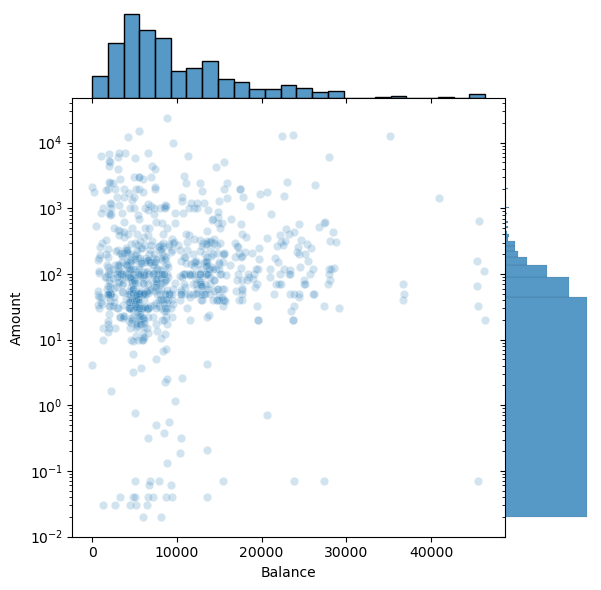

In [52]:
sns.jointplot(data=df, x='Balance', y='Amount', kind='scatter', alpha=0.2, space=0)
plt.yscale('log')
plt.title('Balance vs Amount log scaled')
plt.show()